* https://www.aanda.org/articles/aa/full_html/2016/05/aa28065-15/F1.html

In [6]:
import astroquery
assert astroquery.__version__=='0.4.5'

True

https://astroquery.readthedocs.io/en/latest/ipac/nexsci/nasa_exoplanet_archive.html

In [10]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

#pstable combines data from the Confirmed Planets and Extended Planet Parameters tables
tab = NasaExoplanetArchive.query_criteria(table="pscomppars", 
                                         where="discoverymethod like 'Transit'"
                                         
                                        ) 
df = tab.to_pandas()

In [20]:
from uncertainties import ufloat

def upper_boundary(period, method='stripe'):
    if method=='stripe':
        return -0.33*period+1.17
    elif method=='likelihood':
        a=ufloat(0.31,0.12)
        b=ufloat(1.19,0.06)
        return -a*period+b
    
def lower_boundary(period, method='stripe'):
    if method=='stripe':
        return 0.68*period
    elif method=='likelihood':
        a=ufloat(0.67,0.06)
        b=ufloat(0.01,0.04)
        return a*period-b

In [173]:
ax.errorbar?

In [179]:
np.log10(Rp-0.11), np.log10(Rp), np.log10(Rp+0.11)

(0.4742162640762552, 0.4899584794248346, 0.5051499783199059)

In [187]:
np.c_[(np.log10(Rp+0.11),np.log10(Rp-0.11))].T

array([[0.50514998],
       [0.47421626]])

/home/jp/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-0.5, 3.0)

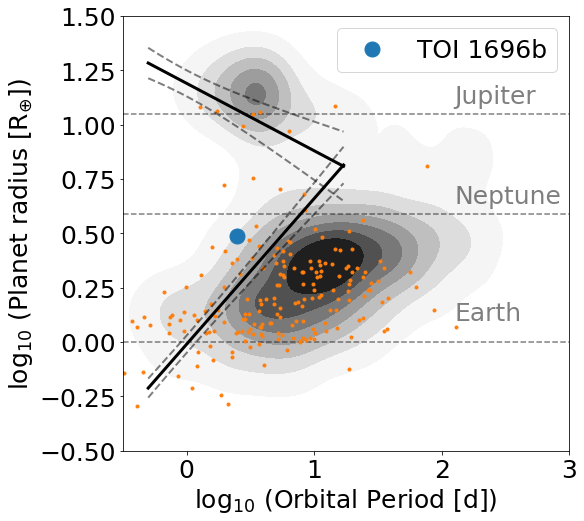

In [197]:
import numpy as np
import seaborn as sb
pl.rcParams['font.size'] = 25

fig, ax = pl.subplots(figsize=(8,8))

xmin,xmax=np.log10(0.5), np.log10(17) #day
x=np.linspace(xmin,xmax)

method='likelihood'
y1=[i.n for i in upper_boundary(x,method=method)]
ys1=[i.s for i in upper_boundary(x,method=method)]

y2=[i.n for i in lower_boundary(x,method=method)]
ys2=[i.s for i in lower_boundary(x,method=method)]

#toi1696
Rp,per=3.09,2.5
ax.plot(np.log10(2.5), np.log10(3.09), 'o', c='C0', ms=15, label="TOI 1696b")
# ax.errorbar(np.log10(per), 
#             np.log10(Rp), 
#             yerr=np.c_[(np.log10(Rp-0.11),np.log10(Rp+0.11))].T, 
#             yerr=np.log10(0.11),
#             marker='o',
#             c='C0', 
#             ms=15, 
#             label="TOI 1696b")
ax.legend()
#known planets
idx = df.st_teff<=3800 #around M dwarfs
ax.plot(np.log10(df.loc[idx,'pl_orbper']), 
        np.log10(df.loc[idx,'pl_rade']), 
        '.', 
        c='C1'
       )
#density contour
_ = sb.kdeplot(np.log10(df['pl_orbper']), 
               np.log10(df['pl_rade']), 
               cmap='gray_r', 
               n_levels=8, 
               log_scale=False, 
               fill=True, 
               ax=ax, 
               zorder=-1)

#upper boundary
ax.plot(x,y1,'k-',lw=3,zorder=10)
ax.plot(x,np.add(y1,ys1),'k--',lw=2,zorder=10,alpha=0.5)
ax.plot(x,np.subtract(y1,ys1),'k--',lw=2,zorder=10,alpha=0.5)
#lower boundary
ax.plot(x,y2,'k-',lw=3,zorder=10)
ax.plot(x,np.add(y2,ys2),'k--',lw=2,zorder=10,alpha=0.5)
ax.plot(x,np.subtract(y2,ys2),'k--',lw=2,zorder=10,alpha=0.5)


ax.set_xlabel("$\log_{10}$ (Orbital Period [d])")
ax.set_ylabel("$\log_{10}$ (Planet radius [R$_{\oplus}$])")

alpha = 0.5
ax.axhline(np.log10(1), 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
dx = 2.1
ax.text(dx, 0.1, 'Earth', alpha=alpha)
Rnep = np.log10(3.88)
ax.axhline(Rnep, 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
ax.text(dx, Rnep+0.05, 'Neptune', alpha=alpha)
Rjup = np.log10(11.2)
ax.axhline(Rjup, 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
ax.text(dx, Rjup+0.05, 'Jupiter', alpha=alpha)
ax.set_ylim(-0.5,1.5)
ax.set_xlim(-0.5,3)

In [198]:
fig.savefig('../paper/figures/neptune_desert.png', bbox_inches='tight')